# Yahoo Finance: Stock Data Project

In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

## Data Retrieval

The stock data used in this project were downloaded from Yahoo Finance using Pandas and datareader. The stock information was retrived for the period of 2011/01/01 to 2021/12/31, for the following tech companies: 
- Tesla
- Amazon
- Apple
- Nvidia
- TSM
- Facebook

** The procedure is adapted from Jose Portilla and Keith Chan.

In [5]:
# First, we set the start and end date for data collection

start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2021, 12, 31)

# Collect stock data from Yahoo Finance
TSLA = data.DataReader("TSLA", 'yahoo', start, end)
AMZN = data.DataReader("AMZN", 'yahoo', start, end)
AAPL = data.DataReader("AAPL", 'yahoo', start, end)
NVDA = data.DataReader("NVDA", 'yahoo', start, end)
GOOGLE = data.DataReader("GOOG", 'yahoo', start, end)
TSM = data.DataReader("TSM", 'yahoo', start, end)


In [6]:
# Create a list of tickers
tickers = ['TSLA', 'AMZN', 'AAPL', 'NVDA', 'GOOG','TSM']

# Concatenate the stock information from all tech companies into a giant dataset
from IPython.display import display, Markdown
display(Markdown("[pd.concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)"))

tech_stocks = pd.concat([TSLA, AMZN, AAPL, NVDA, GOOGLE,TSM],axis=1,keys=tickers)
tech_stocks.columns.names = ['Ticker','Stock Info']

[pd.concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

# Exploratory Data Analysis

In [7]:
tech_stocks.shape

(2769, 36)

### 1. Get the max value for each company

In [9]:
tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Ticker
TSLA    1229.910034
AMZN     186.570496
AAPL     180.330002
NVDA     333.760010
GOOG    3014.179932
TSM      140.050003
dtype: float64

### Find Dates for the Highest and Lowest Return Value

In [10]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.head()

,TSLA Return,AMZN Return,AAPL Return,NVDA Return,GOOG Return,TSM Return
Date,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.001878,0.004288,0.005219,-0.003161,-0.003690,0.003177
2011-01-05,0.005999,0.013026,0.008180,0.076728,0.011543,-0.021378
2011-01-06,0.039135,-0.008324,-0.000808,0.138398,0.007273,0.041262
2011-01-07,0.012912,-0.001991,0.007161,0.027936,0.004792,0.015540


### FIND the Worst Drop

In [11]:
returns['GOOG Return'].argmax()

1141

In [12]:
returns['GOOG Return'].idxmax()

Timestamp('2015-07-17 00:00:00')

In [13]:
returns.idxmax()

TSLA Return   2013-05-09
AMZN Return   2012-04-27
AAPL Return   2020-03-13
NVDA Return   2016-11-11
GOOG Return   2015-07-17
TSM Return    2020-07-27
dtype: datetime64[ns]

In [14]:
returns.std()

TSLA Return    0.034836
AMZN Return    0.019550
AAPL Return    0.017753
NVDA Return    0.026838
GOOG Return    0.016153
TSM Return     0.017796
dtype: float64

In [15]:
returns.loc['2020-01-01':'2020-12-31'].std()

TSLA Return    0.056255
AMZN Return    0.024261
AAPL Return    0.029392
NVDA Return    0.036426
GOOG Return    0.024140
TSM Return     0.028760
dtype: float64

# Data Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

# How to change legend location: 
# https://www.statology.org/seaborn-legend-position/
    

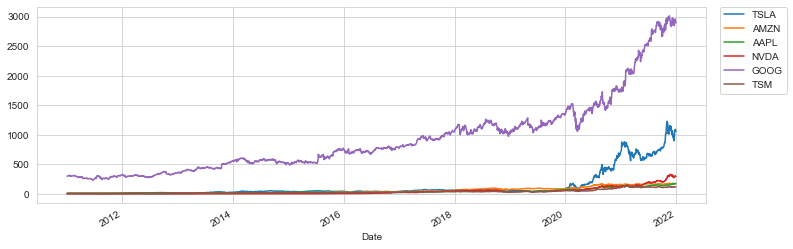

In [17]:
tech_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize = (12,4))

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#### Overtime Trend

In [18]:
tech_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

#### Candlestick Chart

In [19]:
import plotly.graph_objects as go


tickers = ['TSLA', 'AMZN', 'AAPL', 'NVDA', 'GOOG','TSM']

each_df = {}
for ticker in tickers:
    each_df[ticker] = data.DataReader(ticker, 'yahoo', start, end)


# User input ticker of interest
ticker = "AMZN"   
    
fig = go.Figure(data=[go.Candlestick(x=each_df[ticker].index,
                open=each_df[ticker]['Open'],
                high=each_df[ticker]['High'],
                low=each_df[ticker]['Low'],
                close=each_df[ticker]['Close'])])
fig.update_layout(
    title='Candlestick Chart for ' + ticker,
    yaxis_title='Price',
    xaxis_title='Date',
    hovermode='x'
)
fig.show()

# Moving Averages

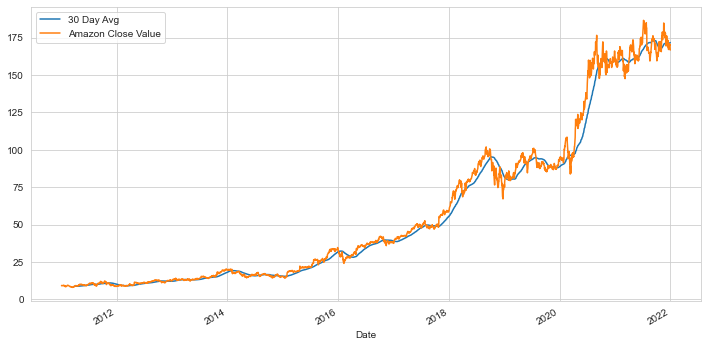

In [20]:
plt.figure(figsize=(12,6))
AMZN['Close'].loc['2011-01-01':'2021-12-31'].rolling(window=60).mean().plot(label='30 Day Avg')
AMZN['Close'].loc['2011-01-01':'2021-12-31'].plot(label='Amazon Close Value')
plt.legend()

# Heatmap

<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

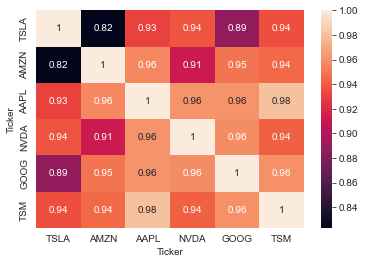

In [21]:
sns.heatmap(tech_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

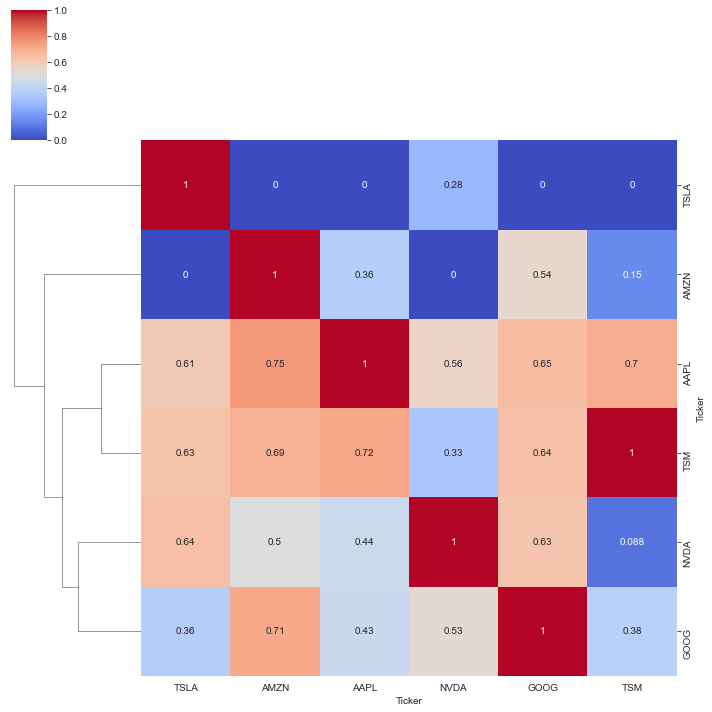

In [22]:
# cluster heat map: https://seaborn.pydata.org/generated/seaborn.clustermap.html

sns.clustermap(tech_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, 
               cmap = 'coolwarm', standard_scale = 1,
              col_cluster = False)

### Iplot

In [23]:
GOOGLE[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2020-12-31'].iplot(kind='candle')

In [24]:
TSLA['Close'].loc['2020-01-01':'2020-12-31'].ta_plot(study='sma',periods=[5,20,60],title='Simple Moving Averages')

In [25]:
NVDA['Close'].loc['2020-01-01':'2020-12-31'].ta_plot(study='boll')